In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

# Define the policy network
class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Linear(1, 64)  # Simple network with one hidden layer
        self.mu_layer = nn.Linear(64, 1)  # Output layer for mu
        self.sigma_layer = nn.Linear(64, 1)  # Output layer for sigma
        
    def forward(self, state):
        x = torch.relu(self.fc(state))
        mu = self.mu_layer(x)
        sigma = torch.exp(self.sigma_layer(x))  # Use exp to ensure sigma is positive
        return mu, sigma

# Initialize policy network and optimizer
policy = PolicyNetwork()
optimizer = optim.Adam(policy.parameters(), lr=0.001)
losses = []

def get_reward(state, action):
    pass

def run_episode(model):
    # Initial state
    x = 0


    pass

# Simple training loop
for episode in range(10000):
    state = torch.randn(1, 1)  # Assume a random state for demonstration
    
    # Forward pass: get mu and sigma for current state
    mu, sigma = policy(state)
    dist = Normal(mu, sigma)
    
    # Sample an action
    action = dist.sample()
    
    # Assume a simple reward function: high reward for actions near 1.0
    reward = -((action - 1.0) ** 2)
    
    # Calculate loss
    loss = -dist.log_prob(action) * reward  # Negative log likelihood loss, weighted by reward
    losses.append(loss.detach().numpy())

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print training information
    if episode % 1000 == 0:
        print(f"Episode {episode}, Loss: {loss.item()}, Mu: {mu.item()}, Sigma: {sigma.item()}, Reward:{reward}, Action: {action}")


Episode 0, Loss: -0.02032620646059513, Mu: 0.31947070360183716, Sigma: 1.043797254562378, Reward:tensor([[-0.0161]]), Action: tensor([[1.1270]])
Episode 1000, Loss: -0.11515402793884277, Mu: 0.8303238153457642, Sigma: 0.3523162007331848, Reward:tensor([[-0.2836]]), Action: tensor([[0.4675]])
Episode 2000, Loss: 0.06797156482934952, Mu: 1.2005119323730469, Sigma: 0.05236804857850075, Reward:tensor([[-0.0342]]), Action: tensor([[1.1850]])
Episode 3000, Loss: 0.0020138779655098915, Mu: 0.9749863147735596, Sigma: 0.05484042316675186, Reward:tensor([[-0.0010]]), Action: tensor([[0.9681]])
Episode 4000, Loss: 5.468390372698195e-05, Mu: 1.0636299848556519, Sigma: 0.08708295226097107, Reward:tensor([[-4.1854e-05]]), Action: tensor([[1.0065]])
Episode 5000, Loss: 0.0013218214735388756, Mu: 1.0138087272644043, Sigma: 0.07831499725580215, Reward:tensor([[-0.0008]]), Action: tensor([[1.0287]])
Episode 6000, Loss: 0.11524731665849686, Mu: 1.220036506652832, Sigma: 0.02701648324728012, Reward:tensor

[array([[-0.02032621]], dtype=float32), array([[-0.44649813]], dtype=float32), array([[-0.03968322]], dtype=float32), array([[-0.82167286]], dtype=float32), array([[-1.4466127]], dtype=float32), array([[-0.00275607]], dtype=float32), array([[-0.78559357]], dtype=float32), array([[-0.00423522]], dtype=float32), array([[-0.00129308]], dtype=float32), array([[-0.04988198]], dtype=float32), array([[-0.07749555]], dtype=float32), array([[-3.8806937]], dtype=float32), array([[-0.06541722]], dtype=float32), array([[-2.0470674]], dtype=float32), array([[-0.00812638]], dtype=float32), array([[-0.29440695]], dtype=float32), array([[-0.16316448]], dtype=float32), array([[-2.3711097]], dtype=float32), array([[-14.96208]], dtype=float32), array([[-5.469704]], dtype=float32), array([[-8.715459]], dtype=float32), array([[-2.6655774]], dtype=float32), array([[-14.492907]], dtype=float32), array([[-0.05716131]], dtype=float32), array([[-0.60725296]], dtype=float32), array([[-0.00051844]], dtype=float32

ValueError: x and y can be no greater than 2D, but have shapes (10000,) and (10000, 1, 1)

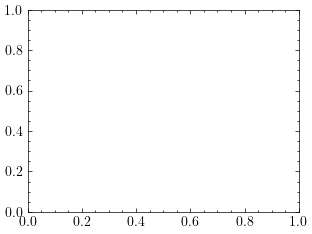

In [15]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
print(losses)
plt.show()